In [2]:
import numpy as np 
import pandas as pd


result_dir = "/data1/jxxiong/ucRH-plot/"
def read_result(file_name, result_dir=result_dir):
    # read the txt file into a pandas DataFrame
    df = pd.read_csv(result_dir+file_name, sep=" ", header=None, skiprows=1)

    # rename the columns
    df.columns = ['instance', 'method', 'time', 'obj', 'status']
    # for entries in 'method', only keep split('_')[0]
    df['method'] = df['method'].apply(lambda x: x.split('_')[0])
    # remove 'case' in the entries in 'instance'
    df['instance'] = df['instance'].apply(lambda x: x.split('case')[1])
    # if "rh" in df['method], remove the row
    df = df[~df['method'].str.contains("rh")]
    # transform 'time' column to int by rounding
    df['time'] = df['time'].apply(lambda x: int(round(float(x))))
    df['obj'] = df['obj'] / 1e7
    
    return df

## instance info

In [3]:
file_name = "/data1/jxxiong/rhSCUC/results/instance_info.txt"
df = pd.read_csv(file_name, sep=" ", header=None)
df.columns = ["instance_name", "num_bus", "num_gen", "num_line", "num_cont"]
df['instance_name'] = df['instance_name'].apply(lambda x: x.split('case')[1])
df = df.sort_values(by=["num_bus"], ascending=True)
df["num_bus"] = df["num_bus"].apply(lambda x: "{:,}".format(int(x)))
df["num_gen"] = df["num_gen"].apply(lambda x: "{:,}".format(int(x)))
df["num_line"] = df["num_line"].apply(lambda x: "{:,}".format(int(x)))
df["num_cont"] = df["num_cont"].apply(lambda x: "{:,}".format(int(x)))
# sort by num_bus

df.to_latex(
    "instance_info.tex",
    index=False,
    escape=False,
    column_format="lllll",
    header=["Instance", "Buses", "Generators", "Lines", "Contingencies"],
    caption="Size of selected instances",
    label="tab:instance_info",
)

In [4]:
instance_order = df["instance_name"].tolist()
instance_order

['1354pegase',
 '1888rte',
 '1951rte',
 '2383wp',
 '2736sp',
 '2737sop',
 '2746wop',
 '2746wp',
 '2848rte',
 '2868rte',
 '2869pegase',
 '3012wp',
 '3120sp',
 '3375wp',
 '6468rte',
 '6470rte',
 '6495rte',
 '6515rte',
 '9241pegase',
 '13659pegase']

## Results

In [5]:

nthreads = 1
threads = 1
file_name_rh = f"res_an_threads_{threads}_nthreads_{nthreads}.txt"
file_name_td = f"res_td_threads_{threads}_nthreads_{nthreads}.txt"
file_name_td_12 = f"res_td_threads_{threads}_nthreads_{nthreads}_window_12.txt"
file_name_uc = f"res_uc_threads_{threads}_nthreads_{nthreads}.txt"

In [6]:
def read_result(file_name, result_dir=result_dir):
    # read the txt file into a pandas DataFrame
    df = pd.read_csv(result_dir+file_name, sep=" ", header=None, skiprows=1)

    # rename the columns
    df.columns = ['instance', 'method', 'time', 'obj', 'status']
    # for entries in 'method', only keep split('_')[0]
    df['method'] = df['method'].apply(lambda x: x.split('_')[0])
    # remove 'case' in the entries in 'instance'
    df['instance'] = df['instance'].apply(lambda x: x.split('case')[1])
    # if "rh" in df['method], remove the row
    df = df[~df['method'].str.contains("rh")]
    # transform 'time' column to int by rounding
    df['time'] = df['time'].apply(lambda x: int(round(float(x))))
    df['obj'] = df['obj'] / 1e7
    
    return df

In [7]:
df_rh = read_result(file_name_rh)

# pivot the DataFrame to create a new DataFrame with instances as rows and methods as columns
df_rh_time = df_rh.pivot(index='instance', columns='method', values='time')
# reset the index to make 'instance' a column again
df_rh_time.reset_index(inplace=True)
# rename the columns to remove the multi-level index
df_rh_time.columns.name = None
# rename the columns to make them more descriptive
df_rh_time.columns = ['instance'] + [col.replace(' ', '_') for col in df_rh_time.columns[1:]]
df_rh_time = df_rh_time[['instance', 'start', 'improve']]
df_rh_time.set_index('instance', inplace=True)
df_rh_time.columns = ['start_time', 'improve_time']
df_rh_time['total_time'] = df_rh_time['start_time'] + df_rh_time['improve_time']
df_rh_time


,start_time,improve_time,total_time
instance,,,
1354pegase,12,14,26
13659pegase,730,518,1248
1888rte,30,32,62
1951rte,16,17,33
2383wp,11,19,30
2736sp,10,21,31
2737sop,8,12,20
2746wop,17,33,50
2746wp,11,22,33


In [8]:
df_rh_obj = df_rh.pivot(index='instance', columns='method', values='obj')
# reset the index to make 'instance' a column again
df_rh_obj.reset_index(inplace=True)
# rename the columns to remove the multi-level index
df_rh_obj.columns.name = None
# rename the columns to make them more descriptive
df_rh_obj.columns = ['instance'] + [col.replace(' ', '_') for col in df_rh_obj.columns[1:]]
df_rh_obj = df_rh_obj[['instance', 'start', 'improve']]
df_rh_obj.set_index('instance', inplace=True)
df_rh_obj.columns = ['start_obj', 'improve_obj']
df_rh_obj

,start_obj,improve_obj
instance,,
1354pegase,1.587100,1.584393
13659pegase,26.714491,26.675865
1888rte,2.357436,2.351984
1951rte,2.511081,2.507050
2383wp,1.374101,1.373918
2736sp,0.971845,0.966463
2737sop,0.858951,0.851754
2746wop,0.871350,0.860374
2746wp,0.983586,0.971736


In [9]:
# merge the two DataFrames on the 'instance' column
df_rh = pd.merge(df_rh_time, df_rh_obj, left_index=True, right_index=True)
# df_result.reset_index(inplace=True)
df_rh = df_rh[['start_time', 'start_obj', 'improve_time', 'improve_obj', 'total_time']]
df_rh

,start_time,start_obj,improve_time,improve_obj,total_time
instance,,,,,
1354pegase,12,1.587100,14,1.584393,26
13659pegase,730,26.714491,518,26.675865,1248
1888rte,30,2.357436,32,2.351984,62
1951rte,16,2.511081,17,2.507050,33
2383wp,11,1.374101,19,1.373918,30
2736sp,10,0.971845,21,0.966463,31
2737sop,8,0.858951,12,0.851754,20
2746wop,17,0.871350,33,0.860374,50
2746wp,11,0.983586,22,0.971736,33


In [10]:
df_td = read_result(file_name_td)
df_td.set_index('instance', inplace=True)
df_td = df_td[['time', 'obj']]
df_td.columns = ['td_time', 'td_obj']
df_td.head()

,td_time,td_obj
instance,,
1354pegase,16,1.615753
2737sop,22,0.893405
2736sp,24,0.993996
1888rte,33,2.390904
2383wp,23,1.380347


In [11]:
df_uc = read_result(file_name_uc)
df_uc.set_index('instance', inplace=True)
df_uc = df_uc[~df_uc['method'].str.contains("improve")]
df_uc = df_uc[['time', 'obj']]
df_uc.columns = ['uc_time', 'uc_obj']
df_uc.head()

,uc_time,uc_obj
instance,,
1354pegase,25,1.575281
2737sop,17,0.846974
2736sp,21,0.961972
1888rte,149,2.345391
2383wp,17,1.368804


In [12]:
df_td_12 = read_result(file_name_td_12)
df_td_12.set_index('instance', inplace=True)
df_td_12 = df_td_12[['time', 'obj']]
df_td_12.columns = ['td_time_12', 'td_obj_12']
df_td_12.head()

,td_time_12,td_obj_12
instance,,
1354pegase,25,1.582424
2737sop,33,0.853363
2736sp,42,0.969004
1888rte,71,2.351944
2383wp,39,1.374249


### combine the three results

In [13]:
results = pd.merge(df_uc, df_td, left_index=True, right_index=True)
results = pd.merge(results, df_rh, left_index=True, right_index=True)
results = pd.merge(results, df_td_12, left_index=True, right_index=True)
results.to_csv(f"results_{nthreads}.csv", index=True)
results['gap'] = (results['improve_obj'] - results['uc_obj']) / results['uc_obj'] * 100
results['start_gap'] = (results['start_obj'] - results['uc_obj']) / results['uc_obj'] * 100
# transform 'gap' column to percentage
results['gap'] = results['gap'].apply(lambda x: "{:.2f}\%".format(x))
results['start_gap'] = results['start_gap'].apply(lambda x: "{:.2f}\%".format(x))
results['td_gap'] = (results['td_obj'] - results['uc_obj']) / results['uc_obj'] * 100
results['td_gap'] = results['td_gap'].apply(lambda x: "{:.2f}\%".format(x))
results['td_time'] = results['td_time'].apply(lambda x: "{:,}".format(int(x)))
results['uc_time'] = results['uc_time'].apply(lambda x: "{:,}".format(int(x)))
results['start_time'] = results['start_time'].apply(lambda x: "{:,}".format(int(x)))
results['improve_time'] = results['improve_time'].apply(lambda x: "{:,}".format(int(x)))
results['total_time'] = results['total_time'].apply(lambda x: "{:,}".format(int(x)))
# df['time (obj)'] = df.apply(lambda row: f"{row['time']} ({row['obj']:.3f})", axis=1)
results['td_obj (gap)'] = results.apply(lambda row: f"{row['td_obj']:.3f} ({row['td_gap']})", axis=1)
results['start_obj (gap)'] = results.apply(lambda row: f"{row['start_obj']:.3f} ({row['start_gap']})", axis=1)
# replace all entries with value 0.0 with '-'
results = results.replace("0", '-')
results = results.replace(0.0, '-')
results = results.loc[instance_order]
results = results[['uc_obj', 'uc_time', 'td_obj (gap)', 'td_time', 'start_obj (gap)', 'start_time']]
results.to_latex(f"results_{nthreads}.tex", index=True, float_format="%.3f", escape=False)
results


,uc_obj,uc_time,td_obj (gap),td_time,start_obj (gap),start_time
instance,,,,,,
1354pegase,1.575281,25,1.616 (2.57\%),16,1.587 (0.75\%),12
1888rte,2.345391,149,2.391 (1.94\%),33,2.357 (0.51\%),30
1951rte,2.49423,227,2.530 (1.42\%),22,2.511 (0.68\%),16
2383wp,1.368804,17,1.380 (0.84\%),23,1.374 (0.39\%),11
2736sp,0.961972,21,0.994 (3.33\%),24,0.972 (1.03\%),10
2737sop,0.846974,17,0.893 (5.48\%),22,0.859 (1.41\%),8
2746wop,0.853321,127,0.000 (-100.00\%),-,0.871 (2.11\%),17
2746wp,0.964628,22,1.002 (3.85\%),22,0.984 (1.97\%),11
2848rte,2.426814,547,2.463 (1.48\%),73,2.438 (0.46\%),50


In [13]:
print(len(results))
assert len(results) == 20

20


## overall performance

In [14]:
results = pd.merge(df_uc, df_td, left_index=True, right_index=True)
results = pd.merge(results, df_rh, left_index=True, right_index=True)
results = pd.merge(results, df_td_12, left_index=True, right_index=True)
results.head()

,uc_time,uc_obj,td_time,td_obj,start_time,start_obj,improve_time,improve_obj,total_time,td_time_12,td_obj_12
instance,,,,,,,,,,,
1354pegase,25,1.575281,16,1.615753,12,1.587100,14,1.584393,26,25,1.582424
2737sop,17,0.846974,22,0.893405,8,0.858951,12,0.851754,20,33,0.853363
2736sp,21,0.961972,24,0.993996,10,0.971845,21,0.966463,31,42,0.969004
1888rte,149,2.345391,33,2.390904,30,2.357436,32,2.351984,62,71,2.351944
2383wp,17,1.368804,23,1.380347,11,1.374101,19,1.373918,30,39,1.374249


In [15]:
results

,uc_time,uc_obj,td_time,td_obj,start_time,start_obj,improve_time,improve_obj,total_time,td_time_12,td_obj_12
instance,,,,,,,,,,,
1354pegase,25,1.575281,16,1.615753,12,1.587100,14,1.584393,26,25,1.582424
2737sop,17,0.846974,22,0.893405,8,0.858951,12,0.851754,20,33,0.853363
2736sp,21,0.961972,24,0.993996,10,0.971845,21,0.966463,31,42,0.969004
1888rte,149,2.345391,33,2.390904,30,2.357436,32,2.351984,62,71,2.351944
2383wp,17,1.368804,23,1.380347,11,1.374101,19,1.373918,30,39,1.374249
1951rte,227,2.494230,22,2.529555,16,2.511081,17,2.507050,33,52,2.499855
2746wop,127,0.853321,0,0.000000,17,0.871350,33,0.860374,50,46,0.872719
2746wp,22,0.964628,22,1.001760,11,0.983586,22,0.971736,33,34,0.974430
3120sp,135,1.176736,44,1.211506,27,1.190801,40,1.187119,67,81,1.184036


In [16]:
df_overall = results.copy()
# change 0 to NaN
df_overall['uc_obj'] = df_overall['uc_obj'].replace(0, np.nan)
df_overall['td_obj'] = df_overall['td_obj'].replace(0, np.nan)
df_overall['td_time'] = df_overall['td_time'].replace(0, np.nan)
df_overall['uc_time'] = df_overall['uc_time'].replace(0, np.nan)
df_overall['start_gap'] = (df_overall['start_obj'] - df_overall['uc_obj']) / df_overall['uc_obj']
df_overall['td_gap'] = (df_overall['td_obj'] - df_overall['uc_obj']) / df_overall['uc_obj']
df_overall['start_speedup'] = (df_overall['start_time'] -  df_overall['uc_time']) / df_overall['uc_time']
df_overall['td_speedup'] = (df_overall['td_time'] -  df_overall['uc_time']) / df_overall['uc_time']

# calculate the average of each column
df_overall_avg = df_overall[['start_gap', 'td_gap', 'start_speedup', 'td_speedup']].mean(numeric_only=True, skipna=True)
df_overall_avg['instance'] = 'Average'

In [17]:
df_overall_avg

start_gap        0.009208
td_gap           0.028411
start_speedup   -0.760748
td_speedup      -0.557901
instance          Average
dtype: object

## thread-4 baselines time

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D # 需要导入以启用3D绘图
from mpl_toolkits.mplot3d.art3d import Poly3DCollection # 用于绘制3D多边形

In [15]:
threads = 1
df_4 = pd.read_csv(f"results_{threads}.csv")
# df_4['instance'] = df_4['instance'].apply(lambda x: x.split('case')[1])
# sort df_4 by 'uc_time' 
df_4.set_index('instance', inplace=True)
instances = ['6468rte', '6470rte', '6495rte', '6515rte', '13659pegase']
df_4 = df_4.loc[instances]
df_4 = df_4.sort_values(by='uc_time')
instances = df_4.index.tolist()
df_4

,uc_time,uc_obj,td_time,td_obj,start_time,start_obj,improve_time,improve_obj,total_time,td_time_12,td_obj_12
instance,,,,,,,,,,,
6495rte,1519,5.404994,350,5.498713,265,5.430819,283,5.424378,548,963,5.422200
6515rte,1870,5.572640,415,5.689158,337,5.619526,356,5.592995,693,865,5.606797
6468rte,2452,5.705538,462,5.831602,262,5.757157,304,5.725187,566,919,5.746266
13659pegase,3762,26.559348,1008,27.005504,730,26.714491,518,26.675865,1248,2107,26.663656
6470rte,26985,6.640395,1095,6.766000,2593,6.677977,716,6.664744,3309,4538,6.674293


Coloring 5 X tick labels...


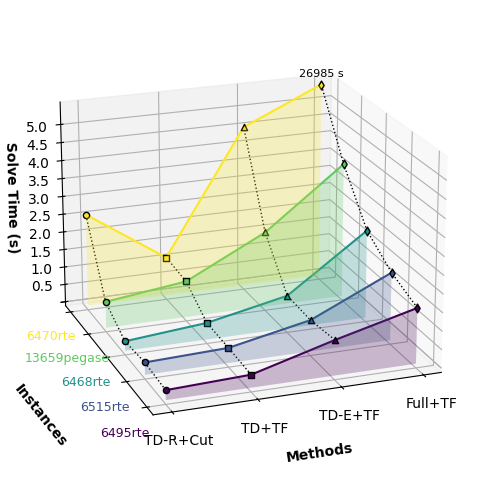

In [ ]:
# --- 1. Data Preparation (Categorical N-axis) ---
# algorithms = ['RHDC(Ours)', 'TD', 'TD (large)', 'Gurobi (TF)']
algorithms = ['TD-R+Cut', 'TD+TF', 'TD-E+TF', 'Full+TF']
n_values = df_4.index.tolist()
n_indices = np.arange(len(n_values))
n_name_to_index = {name: index for index, name in enumerate(n_values)}

# Z-values - **IMPORTANT: Use your ACTUAL data**
# z_data = {ins: df_4.loc[ins][['total_time', 'td_time', 'td_time_12','uc_time']].astype(float).values for ins in instances}
z_data = {ins: df_4.loc[ins][['start_time', 'td_time', 'td_time_12', 'uc_time']].astype(float).values for ins in instances}

alg_indices = np.arange(len(algorithms))
markers = ['o', 's', '^', 'd']
# We will define line styles directly in plot calls now
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))] # No longer needed for constant-N lines
colors = plt.cm.viridis(np.linspace(0, 1, len(instances))) # For constant-N lines/markers

# --- Truncation Settings ---
Z_LIMIT = 5500
Z_BOTTOM = 0

# --- Points to explicitly label IF they are BELOW Z_LIMIT ---
points_to_label_explicitly = [
    #  (1, n_name_to_index['case6515rte']),
    #  (0, n_name_to_index['case13659pegase']),
]
#--------------------------------------------------------------------------

# --- 2. Create Plot ---
fig = plt.figure(figsize=(25, 6))
ax = fig.add_subplot(111, projection='3d')

# --- Data storage for per-algorithm lines ---
z_original_per_alg = [[] for _ in algorithms]

# --- 3. Plot Constant-N Information & Collect Per-Algorithm Data ---
for i, n_name in enumerate(n_values):
    n_index = n_indices[i]
    if n_name in z_data:
        z_original = np.array(z_data[n_name])
        current_color = colors[i]
        z_clipped = np.clip(z_original, Z_BOTTOM, Z_LIMIT)

        for alg_idx in range(len(algorithms)):
             z_original_per_alg[alg_idx].append(z_original[alg_idx])

        # --- Add Shaded Region (using clipped Z) ---
        verts = []
        base_z = Z_BOTTOM if Z_BOTTOM is not None else np.min(z_clipped)
        verts.append((alg_indices[0], n_index, base_z))
        for j, alg_idx in enumerate(alg_indices):
            verts.append((alg_idx, n_index, z_clipped[j]))
        verts.append((alg_indices[-1], n_index, base_z))
        poly = Poly3DCollection([verts], facecolors=current_color, linewidths=0, alpha=0.25)
        ax.add_collection3d(poly)

        # --- Plot the Constant-N Line (X-axis connection) -> SOLID ---
        ax.plot(alg_indices, [n_index]*len(alg_indices), z_clipped,
                label=f'{n_name}',
                linestyle='-', # SOLID line style
                color=current_color, # Color varies by N
                marker=None,
                linewidth=1.5)

        # --- Add Markers and Text Labels ---
        for j, alg_index in enumerate(alg_indices):
            original_val = z_original[j]
            clipped_val = z_clipped[j]
            ax.scatter(alg_index, n_index, clipped_val,
                       marker=markers[j], color=current_color,
                       edgecolor='black', s=20, depthshade=True)

            is_clipped = original_val > Z_LIMIT
            is_explicitly_labeled = (j, n_index) in points_to_label_explicitly
            if is_clipped or (is_explicitly_labeled and not is_clipped):
                text_z_pos = clipped_val + (Z_LIMIT * 0.03)
                label_text = f'{original_val:.0f} s'
                if is_clipped: label_text
                ax.text(alg_index, n_index, text_z_pos, label_text,
                        ha='center', va='bottom', size=8, color='black')

# --- 4. Plot Constant-Algorithm Lines (Y-axis connection) -> DOTTED ---
# Define styles for these algorithm trend lines
# alg_line_style = '--' # Previous style
alg_line_style = ':' # DOTTED line style
alg_line_color = 'black' # Keep black for contrast
alg_line_width = 1.0

for j, alg_name in enumerate(algorithms):
     z_original_alg = np.array(z_original_per_alg[j])
     z_clipped_alg = np.clip(z_original_alg, Z_BOTTOM, Z_LIMIT)

     # Plot the line connecting points for this algorithm across N cases
     ax.plot([j] * len(n_indices), # Constant X
             n_indices,             # Varying Y
             z_clipped_alg,         # Clipped Z
             color=alg_line_color,
             linestyle=alg_line_style, # Use dotted style
             linewidth=alg_line_width,
             label=f'{alg_name} Trend')

# --- 5. Customize Axes ---
ax.set_xlabel('Methods', fontweight='bold')
ax.set_ylabel('Instances', fontweight='bold')
ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 10
# ax.xlable.labelpad = 20
ax.set_zlabel(r'Solve Time ($\times 10^3$ s)', fontweight='bold')
ax.tick_params(axis='y', which='major', pad=5)
ax.set_xticks(alg_indices)
ax.set_xticklabels(algorithms)
ax.set_yticks(n_indices)
ax.set_yticklabels(n_values, rotation=0, ha='center')
z_ticks = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000,0]
ax.set_zticks(z_ticks)
# ax.set_zticklabels([str(i) for i in z_ticks[:-1]] + [' '])
ax.set_zticklabels(['0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0', ' '])
ax.tick_params(axis='y', labelsize=9)
ax.set_zlim(Z_BOTTOM, Z_LIMIT)
ax.view_init(elev=20., azim=-110)


# set tick colors
y_tick_labels = ax.yaxis.get_ticklabels()
if len(colors) != len(y_tick_labels):
     print("Warning: Number of colors doesn't match number of X ticks!")
     # Adjust color list or tick generation if needed

print(f"Coloring {len(y_tick_labels)} X tick labels...")
for i, label in enumerate(y_tick_labels):
    color = colors[i % len(colors)] # Use modulo just in case lengths differ
    label.set_color(color)

# --- 6. Add Legend ---
# ax.legend(title="Legend", loc='upper left', bbox_to_anchor=(1.05, 1.0), fontsize='small')

# --- 7. Add Title & Layout ---
# plt.title(f'Algorithm Performance (*Z > {Z_LIMIT} shown as {Z_LIMIT})')
# plt.tight_layout()
# plt.subplots_adjust(right=0.8) # Adjust layout to make room for legend
# ... inside your customization section ...
# Remove or comment out plt.tight_layout()
# plt.subplots_adjust(left=0.8, bottom=0.30, right=0.9, top=0.9) # Try large values
plt.savefig(f'comparision_time_{threads}.pdf', bbox_inches='tight')
plt.show()


## thread-4 baselines-obj

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D # 需要导入以启用3D绘图
from mpl_toolkits.mplot3d.art3d import Poly3DCollection # 用于绘制3D多边形

In [21]:
threads = 8
df_4 = pd.read_csv(f"results_{threads}.csv")
# sort df_4 by 'uc_time' 
df_4.set_index('instance', inplace=True)
instances = ['6468rte', '6470rte', '6495rte', '6515rte', '13659pegase']
df_4 = df_4.loc[instances]
# sort df_4 by 'uc_time' 
df_4 = df_4.sort_values(by='uc_time')
instances = df_4.index.tolist()
df_4

,uc_time,uc_obj,td_time,td_obj,start_time,start_obj,improve_time,improve_obj,total_time
instance,,,,,,,,,
13659pegase,635,26.562634,1022,27.007163,317,26.733799,422,26.680619,739
6468rte,793,5.705660,440,5.832163,143,5.733361,222,5.726380,365
6515rte,1380,5.572558,356,5.690547,174,5.612937,261,5.599022,435
6495rte,2845,5.402800,302,5.494055,135,5.435216,205,5.426541,340
6470rte,12221,6.640584,777,6.744746,341,6.669900,475,6.663503,816


In [22]:
df = pd.DataFrame()
df['td'] = df_4['td_obj'] / df_4['uc_obj']
# df['td_12'] = df_4['td_obj_12'] / df_4['uc_obj']
df['uc'] = df_4['uc_obj'] / df_4['uc_obj']
df['ours'] = df_4['start_obj'] / df_4['uc_obj']

df

,td,uc,ours
instance,,,
13659pegase,1.016735,1.0,1.006444
6468rte,1.022172,1.0,1.004855
6515rte,1.021173,1.0,1.007246
6495rte,1.016890,1.0,1.006000
6470rte,1.015686,1.0,1.004415


Coloring 5 X tick labels...


/tmp/ipykernel_2779659/3671999721.py:137: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


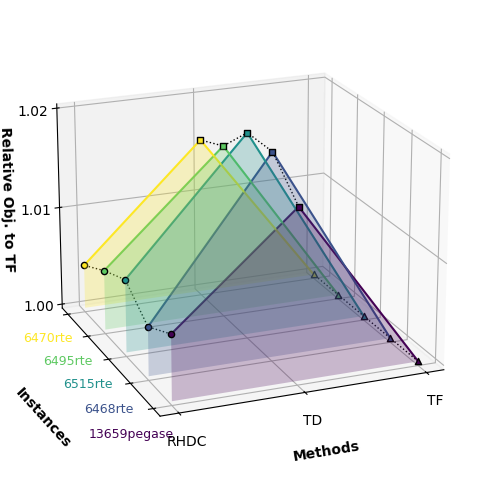

In [23]:
# --- 1. Data Preparation (Categorical N-axis) ---
algorithms = ['RHDC', 'TD', 'TF']
n_values = df.index.tolist()
n_indices = np.arange(len(n_values))
n_name_to_index = {name: index for index, name in enumerate(n_values)}

# Z-values - **IMPORTANT: Use your ACTUAL data**
z_data = {ins: df.loc[ins][['ours', 'td','uc']].astype(float).values for ins in instances}

alg_indices = np.arange(len(algorithms))
markers = ['o', 's', '^', 'd']
# We will define line styles directly in plot calls now
# linestyles = ['-', '--', ':', '-.', (0, (3, 1, 1, 1))] # No longer needed for constant-N lines
colors = plt.cm.viridis(np.linspace(0, 1, len(instances))) # For constant-N lines/markers

# --- Truncation Settings ---
Z_LIMIT = 1.02
Z_BOTTOM = 1.0

# --- Points to explicitly label IF they are BELOW Z_LIMIT ---
points_to_label_explicitly = [
    #  (1, n_name_to_index['case6515rte']),
    #  (0, n_name_to_index['case13659pegase']),
]
#--------------------------------------------------------------------------

# --- 2. Create Plot ---
fig = plt.figure(figsize=(25, 6))
ax = fig.add_subplot(111, projection='3d')

# --- Data storage for per-algorithm lines ---
z_original_per_alg = [[] for _ in algorithms]

# --- 3. Plot Constant-N Information & Collect Per-Algorithm Data ---
for i, n_name in enumerate(n_values):
    n_index = n_indices[i]
    if n_name in z_data:
        z_original = np.array(z_data[n_name])
        current_color = colors[i]
        z_clipped = np.clip(z_original, Z_BOTTOM, Z_LIMIT)

        for alg_idx in range(len(algorithms)):
             z_original_per_alg[alg_idx].append(z_original[alg_idx])

        # --- Add Shaded Region (using clipped Z) ---
        verts = []
        base_z = Z_BOTTOM if Z_BOTTOM is not None else np.min(z_clipped)
        verts.append((alg_indices[0], n_index, base_z))
        for j, alg_idx in enumerate(alg_indices):
            verts.append((alg_idx, n_index, z_clipped[j]))
        verts.append((alg_indices[-1], n_index, base_z))
        poly = Poly3DCollection([verts], facecolors=current_color, linewidths=0, alpha=0.25)
        ax.add_collection3d(poly)

        # --- Plot the Constant-N Line (X-axis connection) -> SOLID ---
        ax.plot(alg_indices, [n_index]*len(alg_indices), z_clipped,
                label=f'{n_name}',
                linestyle='-', # SOLID line style
                color=current_color, # Color varies by N
                marker=None,
                linewidth=1.5)

        # --- Add Markers and Text Labels ---
        for j, alg_index in enumerate(alg_indices):
            original_val = z_original[j]
            clipped_val = z_clipped[j]
            ax.scatter(alg_index, n_index, clipped_val,
                       marker=markers[j], color=current_color,
                       edgecolor='black', s=20, depthshade=True)

            is_clipped = original_val > Z_LIMIT
            is_explicitly_labeled = (j, n_index) in points_to_label_explicitly
            if is_clipped or (is_explicitly_labeled and not is_clipped):
                text_z_pos = clipped_val + (Z_LIMIT * 0.03)
                label_text = f'{original_val:.0f} s'
                if is_clipped: label_text
                ax.text(alg_index, n_index, text_z_pos, label_text,
                        ha='center', va='bottom', size=8, color='black')

# --- 4. Plot Constant-Algorithm Lines (Y-axis connection) -> DOTTED ---
# Define styles for these algorithm trend lines
# alg_line_style = '--' # Previous style
alg_line_style = ':' # DOTTED line style
alg_line_color = 'black' # Keep black for contrast
alg_line_width = 1.0

for j, alg_name in enumerate(algorithms):
     z_original_alg = np.array(z_original_per_alg[j])
     z_clipped_alg = np.clip(z_original_alg, Z_BOTTOM, Z_LIMIT)

     # Plot the line connecting points for this algorithm across N cases
     ax.plot([j] * len(n_indices), # Constant X
             n_indices,             # Varying Y
             z_clipped_alg,         # Clipped Z
             color=alg_line_color,
             linestyle=alg_line_style, # Use dotted style
             linewidth=alg_line_width,
             label=f'{alg_name} Trend')

# --- 5. Customize Axes ---
ax.set_xlabel('Methods', fontweight='bold')
ax.set_ylabel('Instances', fontweight='bold')
ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 10
ax.tick_params(axis='y', which='major', pad=5)
# ax.set_zlabel('Objective (Relative to TF)', fontweight='bold')
ax.set_zlabel('Relative Obj. to TF', fontweight='bold')
ax.set_xticks(alg_indices)
ax.set_xticklabels(algorithms)
ax.set_yticks(n_indices)
ax.set_yticklabels(n_values)
z_ticks = [0.99, 1.00, 1.01, 1.02, 1.03]
ax.set_zticks(z_ticks)
# ax.set_zticklabels([str(i) for i in z_ticks[:-1]] + [' '])
ax.tick_params(axis='y', labelsize=9)
ax.set_zlim(Z_BOTTOM, Z_LIMIT)
ax.view_init(elev=20., azim=-112)


# set tick colors
y_tick_labels = ax.yaxis.get_ticklabels()
if len(colors) != len(y_tick_labels):
     print("Warning: Number of colors doesn't match number of X ticks!")
     # Adjust color list or tick generation if needed

print(f"Coloring {len(y_tick_labels)} X tick labels...")
for i, label in enumerate(y_tick_labels):
    color = colors[i % len(colors)] # Use modulo just in case lengths differ
    label.set_color(color)


# --- 6. Add Legend ---
# ax.legend(title="Legend", loc='upper left', bbox_to_anchor=(1.05, 1.0), fontsize='small')

# --- 7. Add Title & Layout ---
# plt.title(f'Algorithm Performance (*Z > {Z_LIMIT} shown as {Z_LIMIT})')
plt.tight_layout()
plt.savefig(f'comparision_obj_{threads}.pdf', bbox_inches='tight')
plt.show()

## 2-4 v.s.8-8 threads gap

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D # 需要导入以启用3D绘图
from mpl_toolkits.mplot3d.art3d import Poly3DCollection # 用于绘制3D多边形

In [28]:
threads = 1
df_4 = pd.read_csv(f"results_{threads}.csv")
# sort df_4 by 'uc_time' 
df_4.set_index('instance', inplace=True)
instances = ['6468rte', '6470rte', '6495rte', '6515rte', '13659pegase']
df_4 = df_4.loc[instances]
# sort df_4 by 'uc_time' 
df_4 = df_4.sort_values(by='uc_time')
instances = df_4.index.tolist()
df_4

,uc_time,uc_obj,td_time,td_obj,start_time,start_obj,improve_time,improve_obj,total_time,td_time_12,td_obj_12
instance,,,,,,,,,,,
6495rte,1519,5.404994,350,5.498713,265,5.430819,283,5.424378,548,963,5.422200
6515rte,1870,5.572640,415,5.689158,337,5.619526,356,5.592995,693,865,5.606797
6468rte,2452,5.705538,462,5.831602,262,5.757157,304,5.725187,566,919,5.746266
13659pegase,3762,26.559348,1008,27.005504,730,26.714491,518,26.675865,1248,2107,26.663656
6470rte,26985,6.640395,1095,6.766000,2593,6.677977,716,6.664744,3309,4538,6.674293


In [29]:
df_4['td_gap'] = (df_4['td_obj'] - df_4['uc_obj']) / df_4['uc_obj'] * 100
df_4['ours_gap'] = (df_4['start_obj'] - df_4['uc_obj']) / df_4['uc_obj'] * 100
df_4['td_large_gap'] = (df_4['td_obj_12'] - df_4['uc_obj']) / df_4['uc_obj'] * 100
# df_4['td_gap'] = (df_4['td_obj']) / df_4['uc_obj']
# df_4['td_large_gap'] = (df_4['td_obj_12']) / df_4['uc_obj']
# df_4['ours_gap'] = (df_4['start_obj']) / df_4['uc_obj']
df_4 = df_4.loc[['6468rte', '6470rte', '6495rte', '6515rte', '13659pegase']]
df_4

,uc_time,uc_obj,td_time,td_obj,start_time,start_obj,improve_time,improve_obj,total_time,td_time_12,td_obj_12,td_gap,ours_gap,td_large_gap
instance,,,,,,,,,,,,,,
6468rte,2452,5.705538,462,5.831602,262,5.757157,304,5.725187,566,919,5.746266,2.209493,0.904718,0.713834
6470rte,26985,6.640395,1095,6.766000,2593,6.677977,716,6.664744,3309,4538,6.674293,1.891527,0.565953,0.510479
6495rte,1519,5.404994,350,5.498713,265,5.430819,283,5.424378,548,963,5.422200,1.733928,0.477784,0.318336
6515rte,1870,5.572640,415,5.689158,337,5.619526,356,5.592995,693,865,5.606797,2.090900,0.841362,0.612938
13659pegase,3762,26.559348,1008,27.005504,730,26.714491,518,26.675865,1248,2107,26.663656,1.679844,0.584137,0.392735


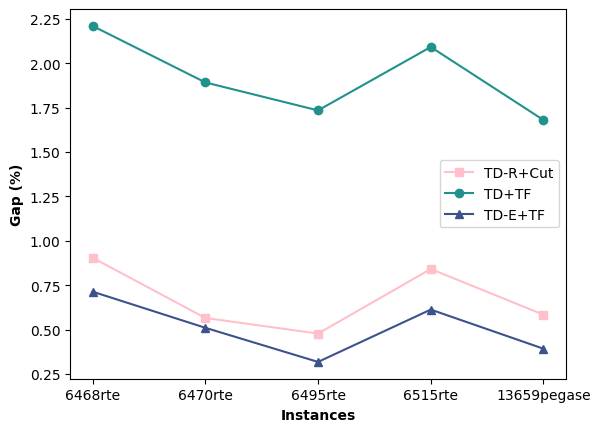

In [31]:
colors = plt.cm.viridis(np.linspace(0, 1, len(instances))) # For constant-N lines/markers
# plt.plot(df_4['ours_gap'], label='RHDC(Ours)', marker='s', color='pink')
# plt.plot(df_4['td_gap'], label='TD', marker='o', color=colors[2])
# plt.plot(df_4['td_large_gap'], label='TD (large)', marker='^', color=colors[1])

plt.plot(df_4['ours_gap'], label='TD-R+Cut', marker='s', color='pink')
plt.plot(df_4['td_gap'], label='TD+TF', marker='o', color=colors[2])
plt.plot(df_4['td_large_gap'], label='TD-E+TF', marker='^', color=colors[1])
plt.xlabel('Instances', fontweight='bold')
plt.ylabel('Gap (%)', fontweight='bold')
plt.legend()
plt.savefig(f'gap_{threads}.pdf', bbox_inches='tight')

## ablation 4 methods

1. RH+DC/ RH+TF / FULL+DC / FULL+TF-4threads

In [18]:
threads = 1
file_name_rhdc = f"res_an_threads_{threads}_nthreads_{threads}.txt"
file_name_rhtf = f"res_an_no_cb_threads_{threads}_nthreads_{threads}.txt"
file_name_dc = f"res_full_cb_threads_{threads}_nthreads_{threads}.txt"
file_name_tf = f"res_uc_threads_{threads}_nthreads_{threads}.txt"
file_name_td_12 = f"res_td_threads_{threads}_nthreads_{threads}_window_12.txt"

In [19]:
def handle_uc(file_name_uc):
    df_uc = read_result(file_name_uc)
    df_uc.set_index('instance', inplace=True)
    df_uc = df_uc[~df_uc['method'].str.contains("improve")]
    df_uc = df_uc[['time', 'obj']]
    df_uc.columns = ['uc_time', 'uc_obj']
    return df_uc

def handle_full_cb(file_name_full_cb):
    df_full_cb = read_result(file_name_full_cb)
    df_full_cb.set_index('instance', inplace=True)
    df_full_cb = df_full_cb[['time', 'obj']]
    df_full_cb.columns = ['full_cb_time', 'full_cb_obj']
    return df_full_cb

def handle_rh_time(file_name):
    df = read_result(file_name)
    df = df.pivot(index='instance', columns='method', values='time')
    df.reset_index(inplace=True)
    df.columns.name = None
    df.columns = ['instance'] + [col.replace(' ', '_') for col in df.columns[1:]]
    df = df[['instance', 'start', 'improve']]
    df.set_index('instance', inplace=True)
    df.columns = ['start_time', 'improve_time']
    df['total_time'] = df['start_time'] + df['improve_time']
    return df

In [20]:
df_rhdc = read_result(file_name_rhdc)

# pivot the DataFrame to create a new DataFrame with instances as rows and methods as columns
df_rhdc_time = df_rhdc.pivot(index='instance', columns='method', values='time')
# reset the index to make 'instance' a column again
df_rhdc_time.reset_index(inplace=True)
# rename the columns to remove the multi-level index
df_rhdc_time.columns.name = None
# rename the columns to make them more descriptive
df_rhdc_time.columns = ['instance'] + [col.replace(' ', '_') for col in df_rhdc_time.columns[1:]]
df_rhdc_time = df_rhdc_time[['instance', 'start', 'improve']]
df_rhdc_time.set_index('instance', inplace=True)
df_rhdc_time.columns = ['start_time', 'improve_time']
df_rhdc_time['total_time'] = df_rhdc_time['start_time'] + df_rhdc_time['improve_time']
df_rhdc_time.head()

,start_time,improve_time,total_time
instance,,,
1354pegase,12,14,26
13659pegase,730,518,1248
1888rte,30,32,62
1951rte,16,17,33
2383wp,11,19,30


In [21]:
df_rhtf_time = handle_rh_time(file_name_rhtf)
df_rhtf_time.head()

,start_time,improve_time,total_time
instance,,,
1354pegase,15,7,22
13659pegase,713,357,1070
1888rte,33,16,49
1951rte,28,9,37
2383wp,14,8,22


In [22]:
df_dc_time = handle_full_cb(file_name_dc)
df_dc_time

,full_cb_time,full_cb_obj
instance,,
1354pegase,24,1.575286
2737sop,9,0.846991
2736sp,10,0.962106
1888rte,199,2.347080
2383wp,8,1.368394
1951rte,127,2.494641
2746wop,31,0.853485
2746wp,13,0.965084
3120sp,63,1.176688


In [23]:
df_tf_time = handle_uc(file_name_tf)
df_tf_time

,uc_time,uc_obj
instance,,
1354pegase,25,1.575281
2737sop,17,0.846974
2736sp,21,0.961972
1888rte,149,2.345391
2383wp,17,1.368804
1951rte,227,2.494230
2746wop,127,0.853321
2746wp,22,0.964628
3120sp,135,1.176736


In [24]:
df_td_12 = read_result(file_name_td_12)
df_td_12.set_index('instance', inplace=True)
df_td_12 = df_td_12[['time', 'obj']]
df_td_12.columns = ['td_time_12', 'td_obj_12']
df_td_12

,td_time_12,td_obj_12
instance,,
1354pegase,25,1.582424
2737sop,33,0.853363
2736sp,42,0.969004
1888rte,71,2.351944
2383wp,39,1.374249
1951rte,52,2.499855
2746wop,46,0.872719
2746wp,34,0.974430
3120sp,81,1.184036


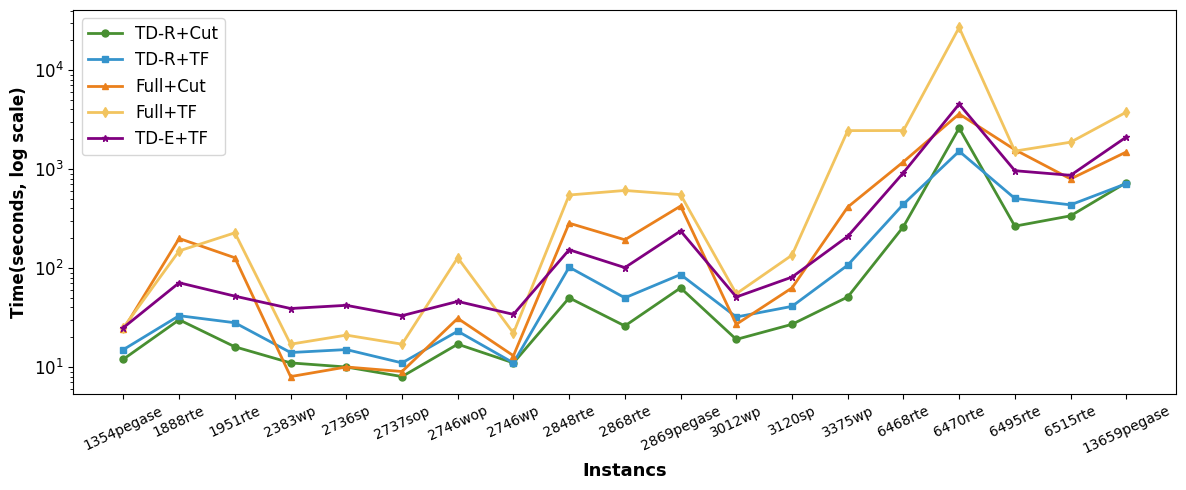

In [26]:
import matplotlib.pyplot as plt

instances = df_tf_time.index.tolist()
instances = instance_order
# remove 9241pegase
instances = [i for i in instances if '9241pegase' not in i]
df_rhdc_time = df_rhdc_time.loc[instances]
df_rhtf_time = df_rhtf_time.loc[instances]
df_dc_time = df_dc_time.loc[instances]
df_tf_time = df_tf_time.loc[instances]
df_td_12 = df_td_12.loc[instances]


# colors = plt.cm.viridis(np.linspace(0, 1, 4))
colors = [
    '#488f31', 
    '#3594cc', 
    '#ea801c',
    '#f2c45f',
    'purple',
]

plt.figure(figsize=(12, 5))
# plt.plot(instances, df_rhdc_time['start_time'], label='RHDC', color=colors[0], linewidth=2, marker='o', markersize=5)
# plt.plot(instances, df_rhtf_time['start_time'], label='RHTF', color=colors[1], linewidth=2, marker='s', markersize=5)
# plt.plot(instances, df_dc_time['full_cb_time'], label='Gurobi (DC)', color=colors[2], linewidth=2, marker='^', markersize=5)
# plt.plot(instances, df_tf_time['uc_time'], label='Gurobi (TF)', color=colors[3], linewidth=2, marker='d', markersize=5)
# plt.plot(instances, df_td_12['td_time_12'], label='TD (large)', color=colors[4], linewidth=2, marker='*', markersize=5)

plt.plot(instances, df_rhdc_time['start_time'], label='TD-R+Cut', color=colors[0], linewidth=2, marker='o', markersize=5)
plt.plot(instances, df_rhtf_time['start_time'], label='TD-R+TF', color=colors[1], linewidth=2, marker='s', markersize=5)
plt.plot(instances, df_dc_time['full_cb_time'], label='Full+Cut', color=colors[2], linewidth=2, marker='^', markersize=5)
plt.plot(instances, df_tf_time['uc_time'], label='Full+TF', color=colors[3], linewidth=2, marker='d', markersize=5)
plt.plot(instances, df_td_12['td_time_12'], label='TD-E+TF', color=colors[4], linewidth=2, marker='*', markersize=5)
plt.legend(fontsize=12)
plt.xticks(rotation=25, fontsize=10)
plt.yticks(fontsize=12)
# set larger font size for x-axis and y-axis labels
plt.yscale('log')
plt.xlabel('Instancs', fontweight='bold', fontsize=13)
plt.ylabel('Time(seconds, log scale)', fontweight='bold', fontsize=12)
plt.tight_layout()
plt.savefig(f"ablation_{threads}.pdf", bbox_inches='tight')
plt.show()

# improvement

In [ ]:
improv_time_1 = [264.074135577, 92.013867556, 75.107872362, 66.73649849 , 76.55475447799999]
improv_obj_1 = [5.757157167375632e7, 5.7563425158304766e7, 5.741296876883722e7, 5.728365453104601e7, 5.7268900654869504e7]
td_1 = [462, 5.832e7]
td_large_1 = [919,5.746266188816497e7]
tf_1 = [2452, 5.706e7]
# calculate the accumulate sum of improv_obj_1, where [improv_obj_1[0], improv_obj_1[0]+improv_obj_1[1] and so on
improv_time_acc_1 = []
for i in range(len(improv_time_1)):
    if i == 0:
        improv_time_acc_1.append(improv_time_1[i])
    else:
        improv_time_acc_1.append(improv_time_acc_1[i-1] + improv_time_1[i])
improv_time_acc_1 = np.array(improv_time_acc_1)
print(improv_time_acc_1)

plt.plot(improv_time_acc_1, improv_obj_1, marker='o', label='RHDC+Improv.')
plt.scatter(td_1[0], td_1[1], marker='^', color='red', label='TD')
plt.scatter(td_large_1[0], td_large_1[1], marker='^', color='blue', label='TD (large)')
plt.scatter(tf_1[0], tf_1[1], marker='s', color='green', label='Gurobi (TF)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Objective')

[264.07413558 356.08800313 431.19587549 497.93237399 574.48712846]


Text(0, 0.5, 'Objective')

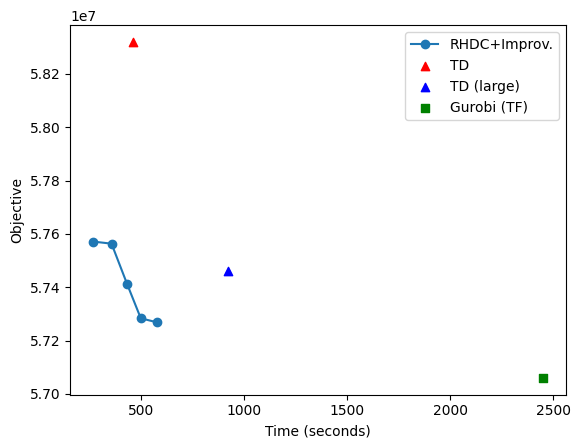

[126.27936467 181.08063877 232.85811929 275.78435467 317.97430389]


Text(0, 0.5, 'Objective')

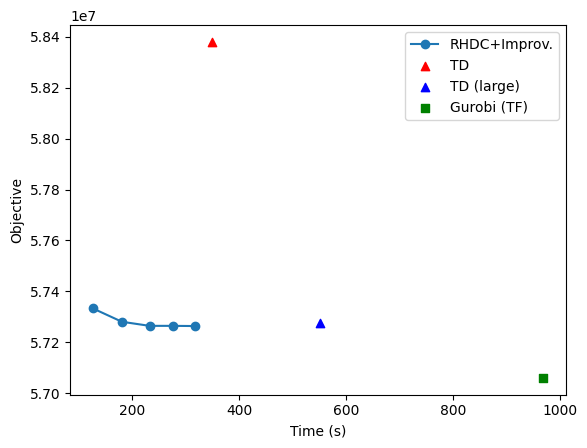

In [45]:
improv_time_4 = [126.27936466500002, 54.801274104, 51.777480524, 42.926235377000005 , 42.189949221999996]
improv_obj_4 = [5.73336104737188e7, 5.728063038532994e7, 5.726455501762553e7, 5.726455501762553e7, 5.7263798705035314e7]
td_4 = [350, 5.838e7]
td_large_4 = [552, 5.727661284874268e7]
tf_4 = [969, 5.706e7]
# calculate the accumulate sum of improv_obj_1, where [improv_obj_1[0], improv_obj_1[0]+improv_obj_1[1] and so on
improv_time_acc_4 = []
for i in range(len(improv_time_4)):
    if i == 0:
        improv_time_acc_4.append(improv_time_4[i])
    else:
        improv_time_acc_4.append(improv_time_acc_4[i-1] + improv_time_4[i])
improv_time_acc_4 = np.array(improv_time_acc_4)
print(improv_time_acc_4)

plt.plot(improv_time_acc_4, improv_obj_4, marker='o', label='RHDC+Improv.')
plt.scatter(td_4[0], td_4[1], marker='^', color='red', label='TD')
plt.scatter(td_large_4[0], td_large_4[1], marker='^', color='blue', label='TD (large)')
plt.scatter(tf_4[0], tf_4[1], marker='s', color='green', label='Gurobi (TF)')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Objective')

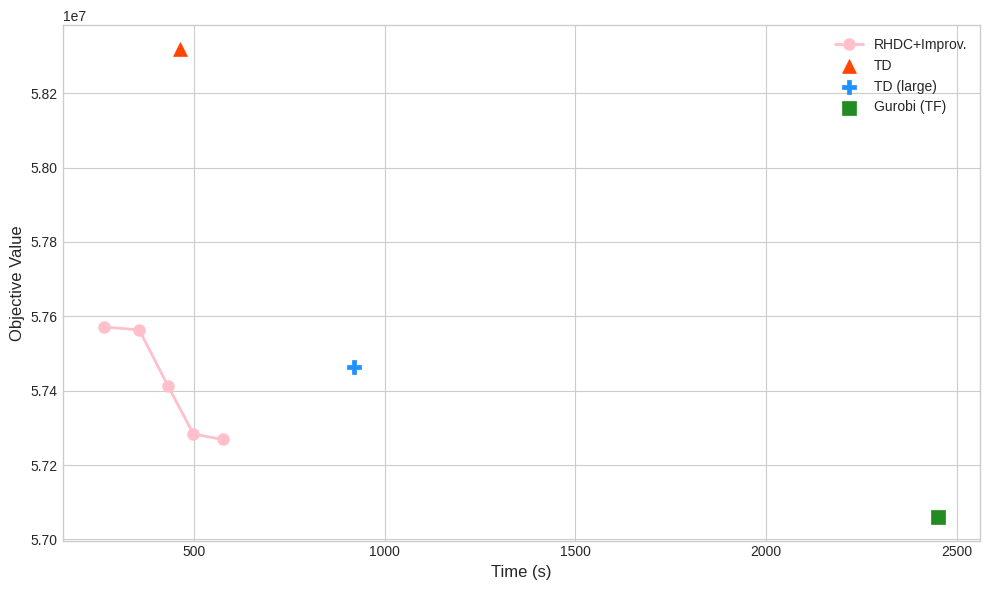

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data 1
threads = 1
if threads == 1:
    improv_time_4 = [264.074135577, 92.013867556, 75.107872362, 66.73649849 , 76.55475447799999]
    improv_obj_4 = [5.757157167375632e7, 5.7563425158304766e7, 5.741296876883722e7, 5.728365453104601e7, 5.7268900654869504e7]
    td_4 = [462, 5.832e7]
    td_large_4 = [919,5.746266188816497e7]
    tf_4 = [2452, 5.706e7]
elif threads == 4:
    #Data 4
    improv_time_4 = [126.27936466500002, 54.801274104, 51.777480524, 42.926235377000005 , 42.189949221999996]
    improv_obj_4 = [5.73336104737188e7, 5.728063038532994e7, 5.726455501762553e7, 5.726455501762553e7, 5.7263798705035314e7]
    td_4 = [350, 5.838e7]
    td_large_4 = [552, 5.727661284874268e7]
    tf_4 = [969, 5.706e7]
else:
    raise ValueError("Invalid number of threads. Please use 1 or 4.")

# Calculate the accumulate sum of improv_time_4
improv_time_acc_4 = np.cumsum(improv_time_4)

# Apply a style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the plot
plt.figure(figsize=(10, 6)) # Increased figure size

# Plotting the main line
plt.plot(improv_time_acc_4, improv_obj_4, marker='o', color='pink', markersize=8, linestyle='-', linewidth=2, label='RHDC+Improv.', zorder=3)

# Plotting scatter points
# Using slightly adjusted colors and larger markers for emphasis
plt.scatter(td_4[0], td_4[1], marker='^', color='orangered', s=100, label='TD', zorder=4, linewidth=0.5)
plt.scatter(td_large_4[0], td_large_4[1], marker='P', color='dodgerblue', s=100, label='TD (large)', zorder=4, linewidth=0.5) # Changed marker to 'P' for Plus (filled)
plt.scatter(tf_4[0], tf_4[1], marker='s', color='forestgreen', s=100, label='Gurobi (TF)', zorder=4, linewidth=0.5) # edgecolors='black'

# Adding labels and title
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Objective Value', fontsize=12)
# plt.title('Algorithm Performance Comparison', fontsize=16, fontweight='bold')

# Adding a legend with better placement
plt.legend(fontsize=10, loc='best')

# Improving tick label appearance
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Using scientific notation for the y-axis for consistency if needed
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Ensure everything fits without overlapping
plt.tight_layout()

# Show the plot
plt.savefig(f"improv_{threads}.pdf", bbox_inches='tight')
plt.show()


# improvement 2

In [12]:
results = pd.merge(df_uc, df_td, left_index=True, right_index=True)
results = pd.merge(results, df_rh, left_index=True, right_index=True)
results = pd.merge(results, df_td_12, left_index=True, right_index=True)
results.head()

,uc_time,uc_obj,td_time,td_obj,start_time,start_obj,improve_time,improve_obj,total_time,td_time_12,td_obj_12
instance,,,,,,,,,,,
1354pegase,25,1.575281,16,1.615753,12,1.587100,14,1.584393,26,25,1.582424
2737sop,17,0.846974,22,0.893405,8,0.858951,12,0.851754,20,33,0.853363
2736sp,21,0.961972,24,0.993996,10,0.971845,21,0.966463,31,42,0.969004
1888rte,149,2.345391,33,2.390904,30,2.357436,32,2.351984,62,71,2.351944
2383wp,17,1.368804,23,1.380347,11,1.374101,19,1.373918,30,39,1.374249


In [13]:
# results.to_csv(f"results_{nthreads}.csv", index=True)
results['improv_gap'] = results['improve_obj']/ results['uc_obj']
results['start_gap'] = results['start_obj'] / results['uc_obj'] 
results['uc_gap'] = results['uc_obj'] / results['uc_obj'] 
results['large_td_gap'] = results['td_obj_12'] / results['uc_obj']
# uc_time, start_time, total_time
results = results[['uc_gap', 'uc_time', 'start_gap', 'start_time', 'improv_gap', 'total_time', 'large_td_gap', 'td_time_12']]
# k

In [14]:
# select the five rows
instance_order = ['6468rte', '6470rte', '6495rte', '6515rte', '13659pegase']
results = results.loc[instance_order]
results 

,uc_gap,uc_time,start_gap,start_time,improv_gap,total_time,large_td_gap,td_time_12
instance,,,,,,,,
6468rte,1.0,2452,1.009047,262,1.003444,566,1.007138,919
6470rte,1.0,26985,1.005660,2593,1.003667,3309,1.005105,4538
6495rte,1.0,1519,1.004778,265,1.003586,548,1.003183,963
6515rte,1.0,1870,1.008414,337,1.003653,693,1.006129,865
13659pegase,1.0,3762,1.005841,730,1.004387,1248,1.003927,2107


In [15]:
# import matplotlib.pyplot as plt
# import numpy as np

# # --- Use a professional and modern style sheet ---
# # This single line changes the entire look and feel of the plot.
# # Other great options: 'seaborn-v0_8-whitegrid', 'ggplot', 'fivethirtyeight'
# plt.style.use('seaborn-v0_8-poster')

# # --- 1. Your Data ---
# instances = instance_order #['Instance 1', 'Instance 2', 'Instance 3', 'Instance 4', 'Instance 5']
# methods = ['Gurobi+TF', 'Relax TD+Cut', 'Relax TD+Cut+Improv.']

# objective_values = {
#     'Gurobi+TF': results['uc_gap'].values,
#     'Relax TD+Cut': results['start_gap'].values,
#     'Relax TD+Cut+Improv.': results['improv_gap'].values
# }

# solving_times = {
#     'Gurobi+TF': results['uc_time'].values,
#     'Relax TD+Cut': results['start_time'].values,
#     'Relax TD+Cut+Improv.': results['total_time'].values
# }

# # --- 2. Create the Subplots ---
# # Increased figure size for better readability with the new style
# fig, (ax_objective, ax_time) = plt.subplots(
#     2, 1,
#     sharex=True,
#     figsize=(8, 6), # Increased size
#     gridspec_kw={'height_ratios': [3, 1]}
# )
# # fig.suptitle('Method Performance Analysis', fontsize=24, weight='bold', y=1.02)

# # --- 3. Plot the Data with Enhanced Aesthetics ---

# # A more sophisticated, colorblind-friendly color palette
# colors = ['#1a9850', '#f46d43', '#4575b4']

# ## Plot 1: Objective Value Line Chart (Top Plot)
# marker = ["o", "s", "^"]  # Different markers for each method
# for i, (method, objectives) in enumerate(objective_values.items()):
#     ax_objective.plot(instances, objectives, marker=marker[i], linestyle='-', label=method, color=colors[i], linewidth=2.5)

# ax_objective.set_ylabel('Relative Objective', fontsize=16, weight='semibold')
# ax_objective.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')
# ax_objective.legend(title="Methods", fontsize=12, loc="upper center")
# # Remove top and right spines for a cleaner look
# ax_objective.spines['top'].set_visible(False)
# ax_objective.spines['right'].set_visible(False)


# ## Plot 2: Solving Time Grouped Bar Chart (Bottom Plot)
# x = np.arange(len(instances))
# width = 0.25
# multiplier = -1

# time_limit = 5000

# for i, (method, times) in enumerate(solving_times.items()):
#     offset = width * multiplier
#     rects = ax_time.bar(x + offset, times, width, label=method, color=colors[i], alpha=0.85)
#     for j, t in enumerate(times):
#         if t > time_limit:
#             ax_time.text(x[j] + offset, time_limit + 100, f'{t}', ha='center', va='bottom', fontsize=10, color='red')
#         else:
#             ax_time.text(x[j] + offset, t + 100, f'{t}', ha='center', va='bottom', fontsize=10)
#     multiplier += 1

# ax_time.set_ylabel('Solve Time (s)', fontsize=16, weight='semibold')
# ax_time.set_xticks(x, instances, fontsize=12)
# # Remove top and right spines for a cleaner look
# ax_time.spines['top'].set_visible(False)
# ax_time.spines['right'].set_visible(False)
# ax_time.grid(False, axis='x') # No vertical grid lines on the bar chart

# # --- 4. Final Formatting ---
# ax_time.set_ylim(0, 5000)
# ax_objective.set_ylim(min(min(o) for o in objective_values.values()) * 0.999, 1.01)

# fig.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig('improvement_analysis.pdf', bbox_inches='tight')
# plt.show()

In [16]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.patches import Patch

# # --- Use a professional and modern style sheet ---
# plt.style.use('seaborn-v0_8-whitegrid')

# # --- 1. Your Data (using placeholder data) ---
# # instance_order = ['6468rte', '6470rte', '6495rte', '6515rte', '13659pegase']
# # methods = ['Gurobi+TF', 'Relax TD+Cut', 'Relax TD+Cut+Improv.']
# # objective_values = {'Gurobi+TF': np.array([1.0, 1.0, 1.0, 1.0, 1.0]), 'Relax TD+Cut': np.array([1.009, 1.0056, 1.0047, 1.0084, 1.0058]), 'Relax TD+Cut+Improv.': np.array([1.0034, 1.0037, 1.0036, 1.0037, 1.0043])}
# # solving_times = {'Gurobi+TF': np.array([2452, 26985, 265, 1870, 3762]), 'Relax TD+Cut': np.array([262, 2593, 548, 337, 730]), 'Relax TD+Cut+Improv.': np.array([566, 3309, 548, 693, 1248])}
# instances = instance_order #['Instance 1', 'Instance 2', 'Instance 3', 'Instance 4', 'Instance 5']
# methods = ['Gurobi+TF', 'Relax TD+Cut', 'Relax TD+Cut+Improv.']

# objective_values = {
#     'Gurobi+TF': results['uc_gap'].values,
#     'Relax TD+Cut': results['start_gap'].values,
#     'Relax TD+Cut+Improv.': results['improv_gap'].values
# }

# solving_times = {
#     'Gurobi+TF': results['uc_time'].values,
#     'Relax TD+Cut': results['start_time'].values,
#     'Relax TD+Cut+Improv.': results['total_time'].values
# }
# # --- 2. Create the Figure and Dual Y-Axes ---
# # Note: A wider figure may be needed to fit the single-line legend
# fig, ax1 = plt.subplots(figsize=(10, 6))
# ax2 = ax1.twinx()

# # --- 3. Define Bar Layout and Colors ---
# # x = np.arange(len(instance_order))
# instance_spacing = 0.6 # <<< THIS VALUE WAS CHANGED FROM 0.8
# x = np.arange(len(instance_order)) * instance_spacing
# n_methods = len(methods)
# bar_width = 0.08
# group_gap = 0.09
# colors = ['#1a9850', '#f46d43', '#4575b4']

# # --- 4. Plot the Grouped Bars ---
# for i, method in enumerate(methods):
#     multiplier = i - (n_methods - 1) / 2
#     offset = multiplier * bar_width
#     obj_pos = x - group_gap / 2 - (bar_width * (n_methods - 1) / 2) + offset
#     time_pos = x + group_gap / 2 + (bar_width * (n_methods - 1) / 2) + offset

#     ax1.bar(obj_pos, objective_values[method], width=bar_width, color=colors[i])
#     rects = ax2.bar(
#         time_pos, solving_times[method], width=bar_width, color=colors[i],
#         alpha=0.8, hatch='//', edgecolor='white'
#     )
#     # ax2.bar_label(rects, padding=3, fontsize=9, rotation=90)

# # --- 5. Final Formatting ---
# obj_color = 'darkslateblue'
# ax1.set_ylabel('Relative Objective', fontsize=16, weight='semibold')#, color=obj_color)
# ax1.tick_params(axis='y', labelsize=14)#, labelcolor=obj_color)
# ax1.set_ylim(0.995, 1.01)

# time_color = 'darkred'
# ax2.set_ylabel('Solve Time (s)', fontsize=16, weight='semibold')#, color=time_color)
# ax2.tick_params(axis='y', labelsize=14)#, labelcolor=time_color)
# ax2.set_ylim(0, max(t for times in solving_times.values() for t in times) * 1.1)

# ax1.set_xlabel('Instance', fontsize=16, weight='semibold')
# ax1.set_xticks(x, instance_order, fontsize=16, rotation=0)

# # <<< KEY CHANGE IS HERE >>>
# # Create the list of 5 legend items
# legend_elements = [Patch(facecolor=colors[i], label=methods[i]) for i in range(n_methods)]
# legend_elements.extend([
#     Patch(facecolor='gray', label='Relative Objective (Solid)'),
#     Patch(facecolor='gray', hatch='//', label='Solve Time (Hatched)')
# ])

# # Set ncol=5 to arrange all 5 items in a single line
# ax1.legend(
#     handles=legend_elements,
#     loc='upper center',
#     bbox_to_anchor=(0.5, 1.12), # Adjusted y-position for a single row
#     ncol=2,                      # This is the critical change
#     # nrow=2,
#     fontsize=14,
# )

# # fig.suptitle('Method Comparison: Objective vs. Solve Time', fontsize=18, weight='bold')
# ax1.grid(axis='y', linestyle='--', which='major', alpha=0.7)
# ax2.grid(False)
# fig.tight_layout(rect=[0, 0, 1, 0.94])

# plt.savefig('improvement_analysis.pdf', bbox_inches='tight')
# plt.show()

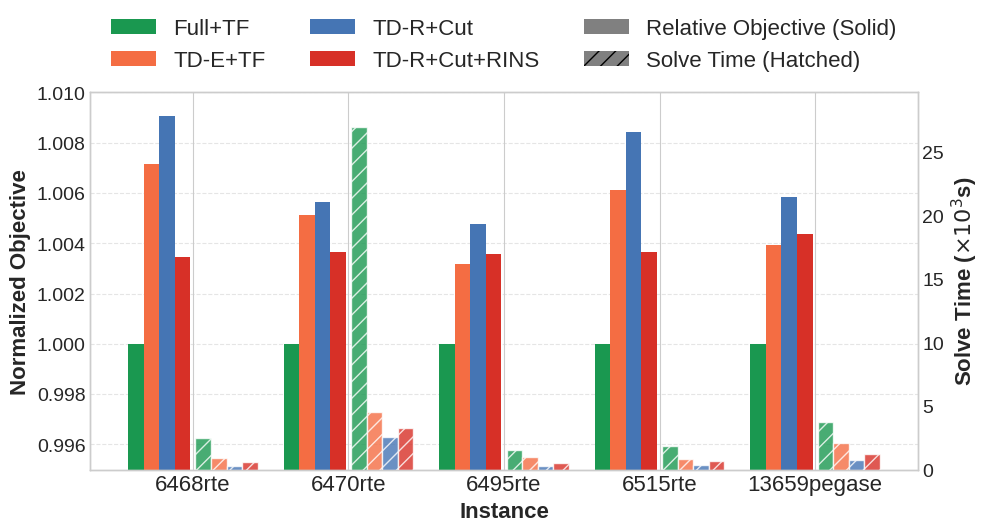

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# --- Use a professional and modern style sheet ---
plt.style.use('seaborn-v0_8-whitegrid')

# --- 1. Your Data (using placeholder data) ---
instances = instance_order #['Instance 1', 'Instance 2', 'Instance 3', 'Instance 4', 'Instance 5']
# methods = ['Full+TF', 'TD-E+TF', 'TD-R+Cut+Improv.']
methods = ['Full+TF', 'TD-E+TF', 'TD-R+Cut', 'TD-R+Cut+RINS']

objective_values = {
    'Full+TF': results['uc_gap'].values,
    'TD-E+TF': results['large_td_gap'].values,
    'TD-R+Cut': results['start_gap'].values,
    'TD-R+Cut+RINS': results['improv_gap'].values
}

solving_times = {
    'Full+TF': results['uc_time'].values,
    'TD-E+TF': results['td_time_12'].values,
    'TD-R+Cut': results['start_time'].values,
    'TD-R+Cut+RINS': results['total_time'].values
}
# --- 2. Create the Figure and Dual Y-Axes ---
# Note: A wider figure may be needed to fit the single-line legend
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

# --- 3. Define Bar Layout and Colors ---
# x = np.arange(len(instance_order))
instance_spacing = 0.6 # <<< THIS VALUE WAS CHANGED FROM 0.8
x = np.arange(len(instance_order)) * instance_spacing
n_methods = len(methods)
bar_width = 0.06
group_gap = 0.08
colors = ['#1a9850', '#f46d43', '#4575b4', '#d73027'] # Added a fourth color for the new method

# --- 4. Plot the Grouped Bars ---
for i, method in enumerate(methods):
    multiplier = i - (n_methods - 1) / 2
    offset = multiplier * bar_width
    obj_pos = x - group_gap / 2 - (bar_width * (n_methods - 1) / 2) + offset
    time_pos = x + group_gap / 2 + (bar_width * (n_methods - 1) / 2) + offset

    ax1.bar(obj_pos, objective_values[method], width=bar_width, color=colors[i])
    rects = ax2.bar(
        time_pos, solving_times[method], width=bar_width, color=colors[i],
        alpha=0.8, hatch='//', edgecolor='white'
    )
    # ax2.bar_label(rects, padding=3, fontsize=9, rotation=90)

# --- 5. Final Formatting ---
obj_color = 'darkslateblue'
ax1.set_ylabel('Normalized Objective', fontsize=16, weight='semibold')#, color=obj_color)
ax1.tick_params(axis='y', labelsize=14)#, labelcolor=obj_color)
ax1.set_ylim(0.995, 1.01)

time_color = 'darkred'
ax2.set_ylabel(r'Solve Time ($\times 10^3$s)', fontsize=16, weight='semibold')#, color=time_color)
ax2.tick_params(axis='y', labelsize=14)#, labelcolor=time_color)
ax2.set_ylim(0, max(t for times in solving_times.values() for t in times) * 1.1)
# setting yticks for ax2
ax2.set_yticks([0, 5000, 10000, 15000, 20000, 25000])
ax2.set_yticklabels(['0', '5', '10', '15', '20', '25'], fontsize=14)

ax1.set_xlabel('Instance', fontsize=16, weight='semibold')
ax1.set_xticks(x, instance_order, fontsize=16, rotation=0)

# <<< KEY CHANGE IS HERE >>>
# Create the list of 5 legend items
legend_elements = [Patch(facecolor=colors[i], label=methods[i]) for i in range(n_methods)]
legend_elements.extend([
    Patch(facecolor='gray', label='Relative Objective (Solid)'),
    Patch(facecolor='gray', hatch='//', label='Solve Time (Hatched)')
])

# Set ncol=5 to arrange all 5 items in a single line
ax1.legend(
    handles=legend_elements,
    loc='upper center',
    bbox_to_anchor=(0.5, 1.25), # Adjusted y-position for a single row
    ncol=3,                      # This is the critical change
    # nrow=2,
    fontsize=16,
)

# fig.suptitle('Method Comparison: Objective vs. Solve Time', fontsize=18, weight='bold')
ax1.grid(axis='y', linestyle='--', which='major', alpha=0.5)
ax2.grid(False)
fig.tight_layout(rect=[0, 0, 1, 0.94])

plt.savefig('improvement_analysis.pdf', bbox_inches='tight')
plt.show()

## Average performance

In [64]:
def geo_mean(arr):
    """Calculate the geometric mean of an array."""
    # replace value 0 with NaN to avoid log(0)
    arr.dropna(inplace=True)  # Remove NaN values
    return np.exp(np.mean(np.log(arr)))

def mean(arr):
    """Calculate the arithmetic mean of an array."""
    arr.dropna(inplace=True)  # Remove NaN values
    return np.mean(arr)

In [92]:
df = pd.read_csv(f"results_1.csv")
df = df.set_index('instance')
df = df.replace(0, np.nan)  # Replace 0 with NaN to avoid log(0) in geometric mean calculation
df.head()

# df = pd.read_csv(f"results_8.csv")
# df = df.set_index('instance')
# df = df.replace(0, np.nan)  # Replace 0 with NaN to avoid log(0) in geometric mean calculation
# df = df.loc[['6468rte', '6470rte', '6495rte', '6515rte', '9241pegase', '13659pegase']]
# df.head()

,uc_time,uc_obj,td_time,td_obj,start_time,start_obj,improve_time,improve_obj,total_time,td_time_12,td_obj_12
instance,,,,,,,,,,,
1354pegase,25.0,1.575281,16.0,1.615753,12,1.587100,14,1.584393,26,25,1.582424
2737sop,17.0,0.846974,22.0,0.893405,8,0.858951,12,0.851754,20,33,0.853363
2736sp,21.0,0.961972,24.0,0.993996,10,0.971845,21,0.966463,31,42,0.969004
1888rte,149.0,2.345391,33.0,2.390904,30,2.357436,32,2.351984,62,71,2.351944
2383wp,17.0,1.368804,23.0,1.380347,11,1.374101,19,1.373918,30,39,1.374249


In [93]:
df['start_gap'] = (df['start_obj'] - df['uc_obj']) / df['uc_obj']
df['td_gap'] = (df['td_obj'] - df['uc_obj']) / df['uc_obj']

In [94]:
print("TF time geo mean:", geo_mean(df['uc_time']))
print("TD time geo mean:", geo_mean(df['td_time']))
print("start time geo mean:", geo_mean(df['start_time']))
print("--------------------")
print("TD gap mean:", mean(df['td_gap']))
print("start gap mean:", mean(df['start_gap']))

TF time geo mean: 281.12592817020584
TD time geo mean: 93.21036561688604
start time geo mean: 59.26362585684096
--------------------
TD gap mean: 0.028411226214961942
start gap mean: 0.00920779558210317


In [91]:
df

,uc_time,uc_obj,td_time,td_obj,start_time,start_obj,improve_time,improve_obj,total_time,td_time_12,td_obj_12,start_gap,td_gap
instance,,,,,,,,,,,,,
6468rte,793.0,5.705660,440.0,5.832163,143,5.733361,222,5.726380,365,831,5.725229,0.004855,0.022172
6470rte,12221.0,6.640584,777.0,6.744746,341,6.669900,475,6.663503,816,4467,6.672387,0.004415,0.015686
6495rte,2845.0,5.402800,302.0,5.494055,135,5.435216,205,5.426541,340,667,5.428154,0.006000,0.016890
6515rte,1380.0,5.572558,356.0,5.690547,174,5.612937,261,5.599022,435,1076,5.599110,0.007246,0.021173
9241pegase,NaN,NaN,2486.0,11.602561,2716,11.406692,2880,11.364048,5596,10513,11.360583,NaN,NaN
13659pegase,635.0,26.562634,1022.0,27.007163,317,26.733799,422,26.680619,739,1435,26.666147,0.006444,0.016735
